# Сборный проект


## Задача 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)до 2016 года. 

Интернет-магазин занимается продажей компьютерных игр по всему миру.При планировании рекламной кампании на 2017-й год, необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

- Исследование пройдет в несколько этпов:
    - Обзор данных.
    - Предобработка данных.
    - Исследовательский анализ данных (EDA).
    - Построение профиля пользователей по регионам
    - формирование и проверка статистических гипотез. 
    - Вывод и рекомендации.

## Обзор и предобработка данных 

In [1]:
import os  # импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
import warnings  # отключение  предупреждений
warnings.filterwarnings('ignore')

In [3]:
# изменение опции показа числовых данных
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
if os.path.exists('/datasets/games.csv'):   # чтение файлов с данными
    games = pd.read_csv('/datasets/games.csv')
else:
    games = pd.read_csv('games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
games.info()  # получение общей информации о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games.describe()  # получение общей информации о данных

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


### Описание данных:

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет 
    рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
    
    Данные за 2016 год могут быть неполными.

 ### Подготовка данных

In [7]:
# приведение названия столбцов к нормальному виду
games.columns = games.columns.str.lower()
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
def value(df, *columns):  # функция познакомит нас с данными в нужных колонках
    display(df.info())
    for column in columns:
        display(column)
        display(df[column].value_counts().sort_values(ascending=False))
        display('Количестово уникальных значений = {}'.format(
            len(df[column].unique())))
        display(df[column].describe(datetime_is_numeric=True))
        print('*'*20)

In [9]:
value(games, 'critic_score', 'user_score', 'rating')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

'critic_score'

70.00    256
71.00    254
75.00    245
78.00    240
73.00    238
        ... 
29.00      3
13.00      1
22.00      1
17.00      1
21.00      1
Name: critic_score, Length: 82, dtype: int64

'Количестово уникальных значений = 83'

count   8,137.00
mean       68.97
std        13.94
min        13.00
25%        60.00
50%        71.00
75%        79.00
max        98.00
Name: critic_score, dtype: float64

********************


'user_score'

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
0.5       2
1         2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

'Количестово уникальных значений = 97'

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

********************


'rating'

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

'Количестово уникальных значений = 9'

count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

********************


В столбце с оценкой пользователей присутствет аббревиатура 'tbd'= To Be Determined, то есть "Будет определено", могут быть и иные значения, например To Be Done - должно быть сделано, или To Be Discussed - подлежит обсуждению. 

Это означает что оценка ещё не выставлена, что для нас равносильно пропуску. В оценке рейтинга игроков не участвует. Можем заменить на  пропуск, для формирования только числовых згачений в столбце.

In [10]:
games['user_score'].replace('tbd', np.nan, inplace=True)

In [11]:
games['user_score'] = games['user_score'].astype(float)

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию
- 'rating'
- «E» («Everyone») — «Для всех»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «EC» («Early childhood») — «Для детей младшего возраста»
- «K-A» («for Kids to Adults») - для всех, использовался до 1998, затем заменен на рейтинг «E»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

In [12]:
games['rating'] = games['rating'].fillna('Нет оценок')

In [13]:
games[games['name'].isnull()]  # выявление пропусков

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,Нет оценок
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,Нет оценок


Всего 2 записи, но общую оценку и анализ не поаляюят. Можем удалить.  

In [14]:
games.dropna(subset=['name'], inplace=True)  # удаление ненужных значений

In [15]:
games.duplicated().sum()  # проверка на дубликаты

0

Явных дубликатов нет, но что если встречаются дубликаты только в одлном столбце. Например в названиях игр ?

In [16]:
games.loc[games.duplicated(subset=['name'])].sort_values(
    by=['name']).head(20)  # проверка на дубликаты

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,"2,013.00",Platform,0.21,0.26,0.00,0.04,NaN,NaN,Нет оценок
9507,007: Quantum of Solace,DS,"2,008.00",Action,0.11,0.01,0.00,0.01,65.00,NaN,T
4475,007: Quantum of Solace,PS2,"2,008.00",Action,0.17,0.00,0.00,0.26,NaN,NaN,Нет оценок
1785,007: Quantum of Solace,PS3,"2,008.00",Action,0.43,0.51,0.02,0.19,65.00,6.60,T
3120,007: Quantum of Solace,Wii,"2,008.00",Action,0.29,0.28,0.01,0.07,54.00,7.50,T
14658,007: Quantum of Solace,PC,"2,008.00",Action,0.01,0.01,0.00,0.00,70.00,6.30,T
2243,007: The World is not Enough,PS,"2,000.00",Action,0.51,0.35,0.00,0.06,61.00,6.70,T
15656,11eyes: CrossOver,PSP,"2,010.00",Adventure,0.00,0.00,0.02,0.00,NaN,NaN,Нет оценок
10076,18 Wheeler: American Pro Trucker,GC,"2,002.00",Racing,0.09,0.02,0.00,0.00,52.00,6.80,E
12283,187: Ride or Die,XB,"2,005.00",Racing,0.05,0.01,0.00,0.00,51.00,6.90,M


Одна и таже игра встречается несколько раз. скорее всего это связано с выходом на разных платформах.

In [17]:
games.groupby('name')['platform'].count().sort_values(ascending=False).head(20)

name
Need for Speed: Most Wanted                12
LEGO Marvel Super Heroes                    9
Ratatouille                                 9
Madden NFL 07                               9
FIFA 14                                     9
LEGO Jurassic World                         8
Madden NFL 08                               8
Monopoly                                    8
FIFA 15                                     8
LEGO The Hobbit                             8
Lego Batman 3: Beyond Gotham                8
LEGO Star Wars II: The Original Trilogy     8
Angry Birds Star Wars                       8
FIFA Soccer 13                              8
Cars                                        8
The LEGO Movie Videogame                    8
LEGO Harry Potter: Years 5-7                8
Terraria                                    8
Harry Potter and the Half-Blood Prince      7
Harry Potter and the Sorcerer's Stone       7
Name: platform, dtype: int64

Предположение подтвердилось. Тк оценка будет происходить независмо для каждой платформы/региона удалить дубликаты мы не можем. Оставляем всё в исходном виде.

### Cуммарные продажи во всех регионах.

In [18]:
# введем дополнительный столбец для общего анализа
games['sales'] = games['na_sales']+games['eu_sales'] + \
    games['jp_sales']+games['other_sales']
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,Нет оценок,40.24
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Нет оценок,31.38
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Нет оценок,30.26
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Нет оценок,28.31


### Предварительный вывод 

- более 16 000 записей о продажах игр 
- период с 1980 по 2016гг (данные за крайние года могут быть не полными)
- информация о продажах в в североамериканском/европейском/ японском регионе вынесена в отдельные графы. самые прибыльные рынки.
- выявлены незначительное количество пропусков в названиях игр.  
- выполнено преобразование типов данных со значениями дат
- выявлено дублирование названий игр для разных платформ. Принято как записи с различными значениями для отдельного анализа по платформам.
- значения с невыставленными оценками в графе "оценка пользователей" приравнены к пропускам
- можем предположить что данные по рейтингу  собирались только для одного региона.
- значения с невыставленными оценками в графе "рейтинг" заменены на обобщающее значение
- введено дополнительное значение с суммарными значениями по продажам каждого наименования.
- в остальном предположительно данные "чистые" , дополнительной обработки не требуется

## Исследовательский анализ данных

In [19]:
# суммарное количество выпущенных игр в каждый год
years_pivot = games.groupby(
    'year_of_release')['name'].count().reset_index()
years_pivot.columns = ['year_of_release', 'releases']
years_pivot.head()

,year_of_release,releases
0,"1,980.00",9
1,"1,981.00",46
2,"1,982.00",36
3,"1,983.00",17
4,"1,984.00",14


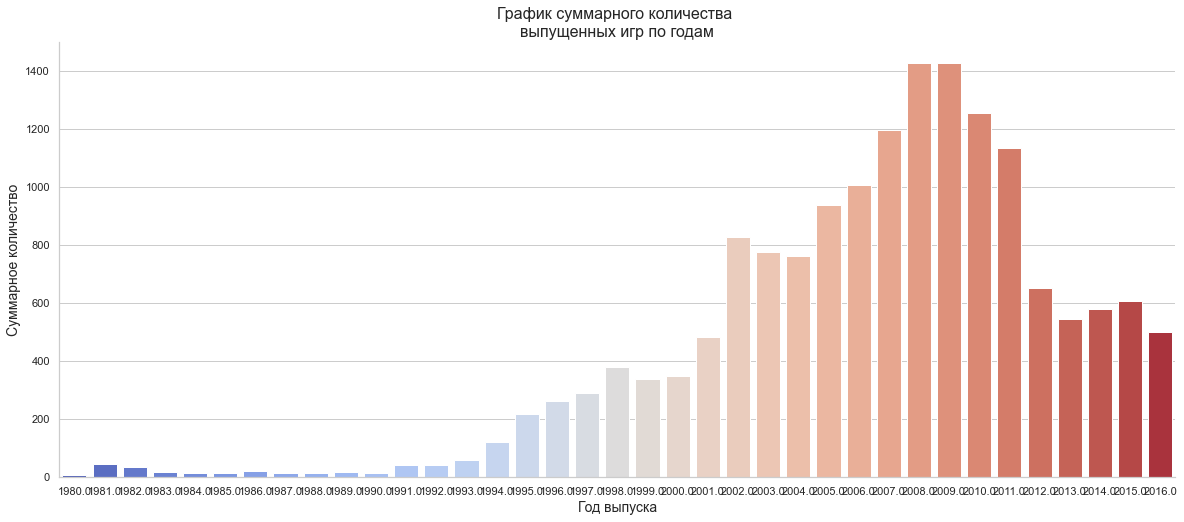

In [20]:
# Строим график
plt.figure(figsize=(20, 8))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
sns.barplot(data=years_pivot, x="year_of_release",
            y="releases", palette="coolwarm")
# Plot formatting
plt.title('График суммарного количества \nвыпущенных игр по годам', fontsize=16)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Cуммарное количество', fontsize=14)
plt.show()

Явно видно что данные до 1994-195 год не интересны совсем. Слишком мало записей. Данные с 1995 по 2005 предварительно могут считаться не актуальными (устраевшими) для рекламной компании после 2015.

In [21]:
# суммарные продажи по платформам за всю историю
platform_pivot = games.groupby('platform')['sales'].sum(
).sort_values(ascending=False).reset_index()
platform_pivot.columns = ['platform', 'total_sales']
platform_pivot.head(6)

,platform,total_sales
0,PS2,"1,255.77"
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86


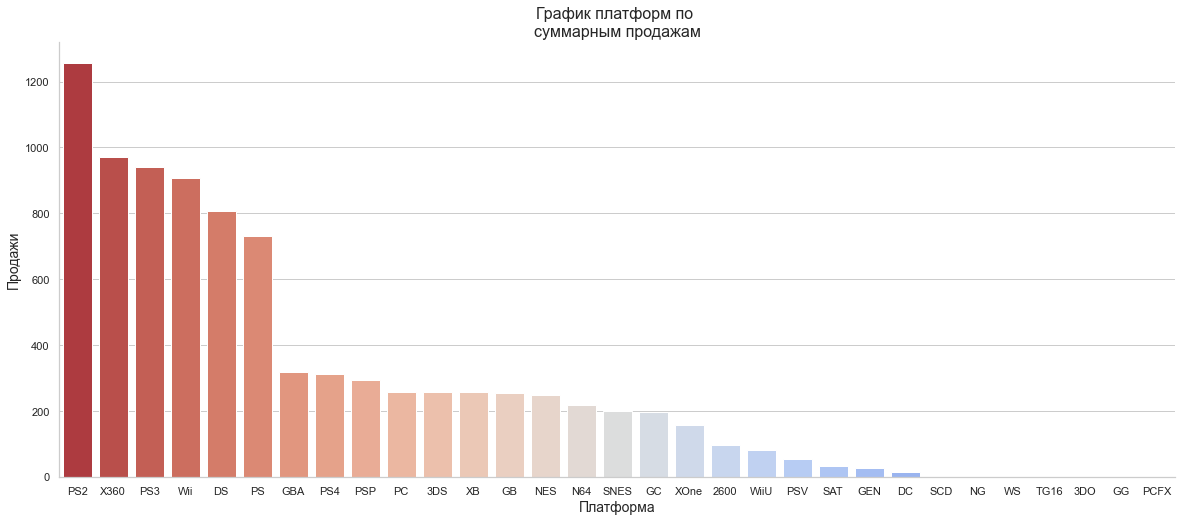

In [22]:
# Строим график
plt.figure(figsize=(20, 8))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)

sns.barplot(data=platform_pivot, x="platform",
            y="total_sales", palette="coolwarm_r")
# Plot formatting
plt.title('График платформ по \nсуммарным продажам', fontsize=16)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.show()

Определены явные лидеры по суммарным продажам. О причинах пока говорить рано.

In [23]:
# отберем только выявленных лидеров и посмотрим на историю
games_top = games[(games.platform == 'PS2') | (games.platform == 'X360')
                  | (games.platform == 'PS3') | (games.platform == 'Wii')
                  | (games.platform == 'DS') | (games.platform == 'PS')]

In [24]:
games_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,"2,009.00",Sports,0.00,0.00,0.01,0.00,NaN,NaN,Нет оценок,0.01
16704,Plushees,DS,"2,008.00",Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,"2,008.00",Racing,0.00,0.00,0.00,0.00,NaN,NaN,Нет оценок,0.00
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,Нет оценок,0.01


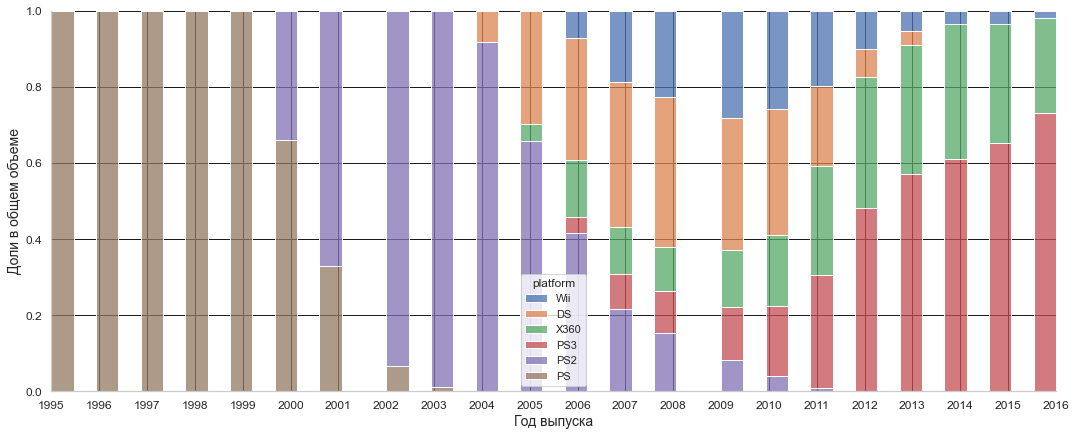

In [25]:
# Строим график
plt.figure(figsize=(18, 7))
plt.grid(visible=True, which='major', color='k')

sns.histplot(data=games_top.loc[games_top['year_of_release'] > 1994],
             x=games_top['year_of_release'], hue='platform', multiple="fill", palette="deep",  cbar=True)
# Plot formatting
plt.ylabel('Доли в общем объеме', fontsize=14)
plt.xlabel('Год выпуска', fontsize=14)
plt.xticks(np.arange(1995, 2017, 1).tolist())
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Видно что у каждой платформы есь периоды взлетов и падений. Технологии развиваются и на рынок выходяит новые игроки. В среднем срок жизни игровой платформы - 7-10 лет. Подтверждается гипотеза о том, что данные для рекламной кампании ранее 2005г - не ревалентны.

Определим актуальный преиод для дальнейшего анализа как 2011-2016. В дальнейшем будем раьботать только с этим интервалом.
   

In [26]:
games_actual = games.loc[games['year_of_release'] > 2011]

Для выбера потенциально прибыльных платформ определим какие сейчас растут по продажам, а какие падают.
   

In [27]:
# разбивка платформ по годам и суммарным продажам
platform_by_year_pivot = games_actual.groupby(['year_of_release', 'platform'])[
    'sales'].sum().reset_index()
platform_by_year_pivot.columns = [
    'year_of_release', 'platform', 'sales_in_year']
platform_by_year_pivot.head(15)

,year_of_release,platform,sales_in_year
0,"2,012.00",3DS,51.36
1,"2,012.00",DS,11.01
2,"2,012.00",PC,23.22
3,"2,012.00",PS3,107.36
4,"2,012.00",PSP,7.69
5,"2,012.00",PSV,16.19
6,"2,012.00",Wii,21.71
7,"2,012.00",WiiU,17.56
8,"2,012.00",X360,99.74
9,"2,013.00",3DS,56.57


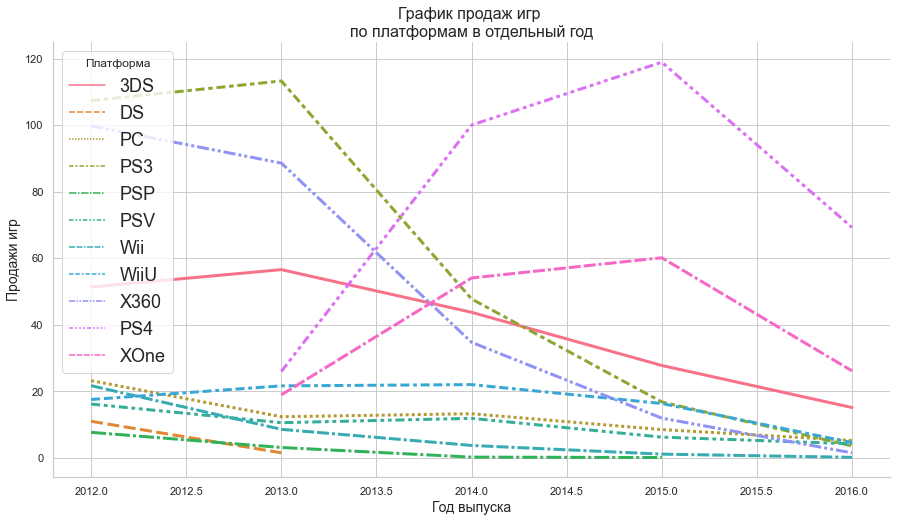

In [28]:
# Строим график
plt.figure(figsize=(15, 8))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params, palette="pastel")

sns.lineplot(x="year_of_release", y="sales_in_year", hue='platform',
             data=platform_by_year_pivot, style='platform', linewidth=3.0)

# Plot formatting
plt.legend(prop={'size': 18}, title='Платформа', loc='upper left')
plt.title('График продаж игр \nпо платформам в отдельный год', fontsize=16)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Продажи игр', fontsize=14)

plt.show()

За 2016г данные не полные  и на спад продаж на графике пока не обращаем внимания. 2 лидера это PS4 и Xone. Так же видно что на протяжении всей истории стационарные компьютеры занимают почти одинаковое положение. Стабильность это хорошо.

Посмотрим как в среднем продавались игры на разных платформах.

In [29]:
# группировка по именам и платформам
sales_by_platform_pivot = games_actual.groupby(['name', 'platform'])[
    'sales'].sum().sort_values(ascending=False).reset_index()
sales_by_platform_pivot.columns = ['name', 'platform', 'sales_in_platform']
sales_by_platform_pivot.head(15)

,name,platform,sales_in_platform
0,Grand Theft Auto V,PS3,21.05
1,Grand Theft Auto V,X360,16.27
2,Call of Duty: Black Ops 3,PS4,14.63
3,Pokemon X/Pokemon Y,3DS,14.60
4,Call of Duty: Black Ops II,PS3,13.79
5,Call of Duty: Black Ops II,X360,13.68
6,Grand Theft Auto V,PS4,12.62
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,11.68
8,Call of Duty: Ghosts,X360,10.24
9,New Super Mario Bros. 2,3DS,9.90


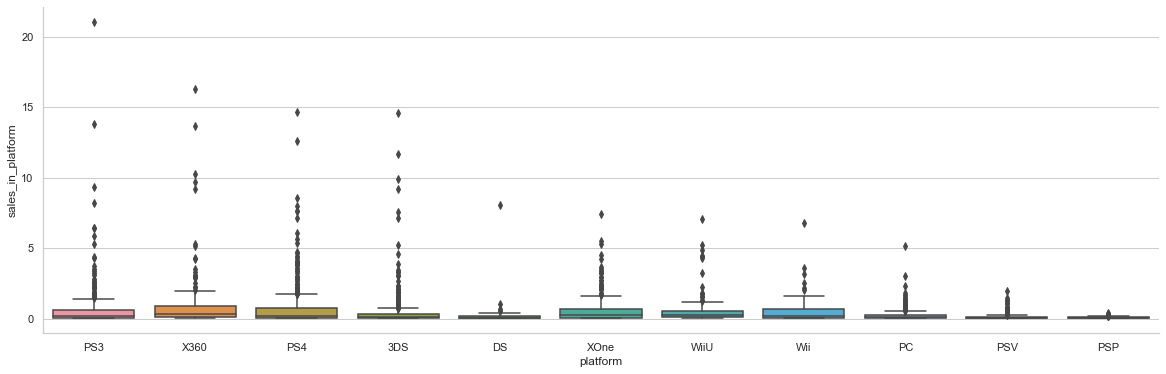

In [30]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='platform', y="sales_in_platform", data=sales_by_platform_pivot)
plt.show()

Необходимо изменить масштаб графика

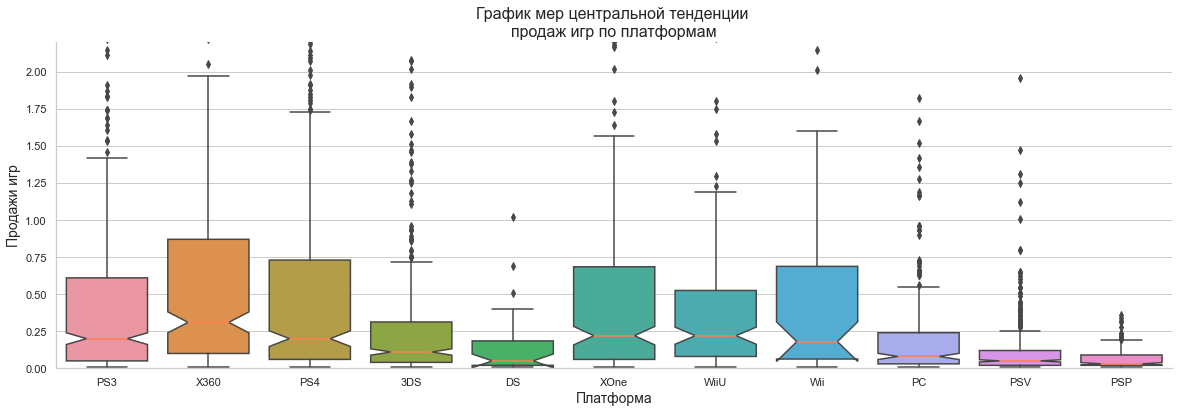

In [31]:
# Строим график
plt.figure(figsize=(20, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params, palette="pastel")
sns.boxplot(x='platform', y="sales_in_platform", data=sales_by_platform_pivot, notch=True, medianprops={
    "color": "coral"})

# Plot formatting
plt.title('График мер центральной тенденции \nпродаж игр по платформам', fontsize=16)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Продажи игр', fontsize=14)

plt.ylim(-0, 2.2)
plt.show()

К нашим двум лидерам добавилось ещё несколько имен, это те же кого мы видили в скуммарных продажах. Это говорит о стабильных хороших продажах на платформе.

Так же необходимо посмотреть на взаимосвязь между продажами и оценками критиков и пользователей.  Возьмем самую популярную сейчас платформу. 

In [32]:
# фильтр по имени платформы
games_actual_PS4 = games_actual.loc[games_actual['platform'] == 'PS4']
games_actual_PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,"2,015.00",Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Нет оценок,14.63
42,Grand Theft Auto V,PS4,"2,014.00",Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
77,FIFA 16,PS4,"2,015.00",Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,"2,015.00",Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Нет оценок,7.98
92,Call of Duty: Advanced Warfare,PS4,"2,014.00",Shooter,2.81,3.48,0.14,1.23,83.00,5.70,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,"2,016.00",Adventure,0.00,0.00,0.01,0.00,69.00,7.50,Нет оценок,0.01
16503,Shin Hayarigami 2,PS4,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Нет оценок,0.01
16526,Dungeons 2,PS4,"2,016.00",Role-Playing,0.01,0.00,0.00,0.00,61.00,7.90,T,0.01
16530,Carmageddon: Max Damage,PS4,"2,016.00",Action,0.01,0.00,0.00,0.00,51.00,5.50,M,0.01


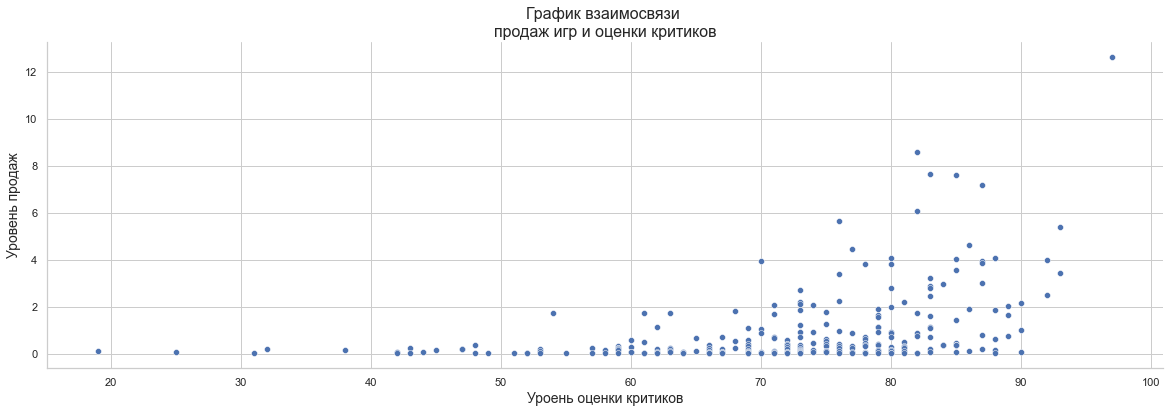

In [33]:
# Строим график
plt.figure(figsize=(20, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params, palette="deep")
sns.scatterplot(x='critic_score', y="sales", data=games_actual_PS4)

# Plot formatting
plt.title('График взаимосвязи \nпродаж игр и оценки критиков', fontsize=16)
plt.xlabel('Уроень оценки критиков', fontsize=14)
plt.ylabel('Уровень продаж', fontsize=14)

plt.show()

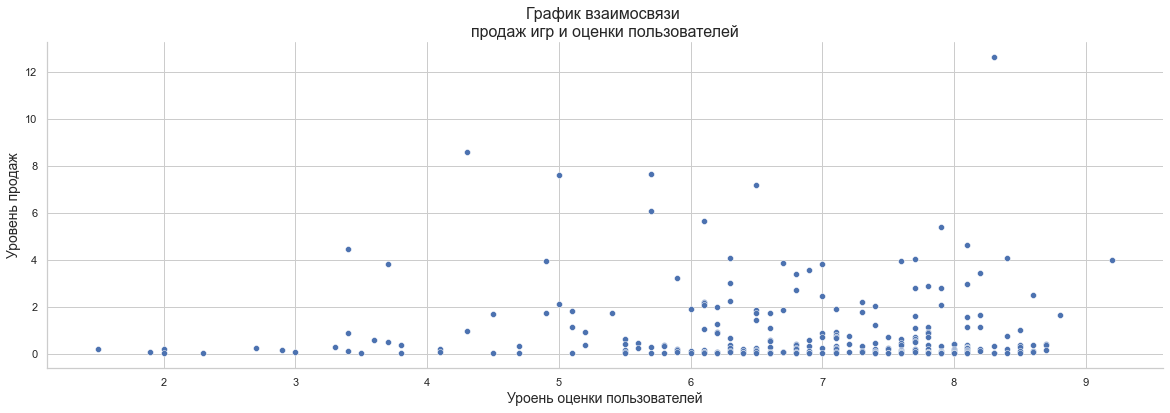

In [34]:
# Строим график
plt.figure(figsize=(20, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params, palette="deep")
sns.scatterplot(x='user_score', y="sales", data=games_actual_PS4)

# Plot formatting
plt.title('График взаимосвязи \nпродаж игр и оценки пользователей', fontsize=16)
plt.xlabel('Уроень оценки пользователей', fontsize=14)
plt.ylabel('Уровень продаж', fontsize=14)

plt.show()

In [35]:
corr_PS4 = games_actual_PS4[['critic_score', 'user_score', 'sales']].corr()
corr_PS4.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
sales,0.406568,-0.031957,1.000000


Видно что оценки критиков сильней влияют на продажи , чем оценка пользователей. Посмотрим эти взаимосвязи на других платформах.

In [36]:
# фильтр по нескольким популярным платформам
games_actual_top = games_actual.loc[(games_actual.platform == 'PS4') | (games_actual.platform == 'XOne')
                                    | (games_actual.platform == 'PS3') | (games_actual.platform == 'X360')
                                    | (games_actual.platform == 'WiiU')]

'Платформа PS4'

,critic_score,user_score,sales
critic_score,1.000000,0.552254,0.355986
user_score,0.552254,1.000000,0.009301
sales,0.355986,0.009301,1.000000


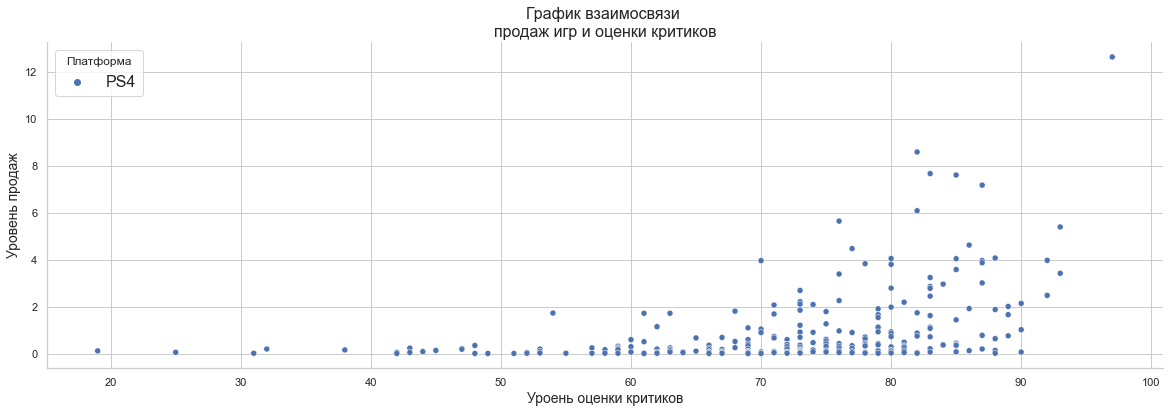

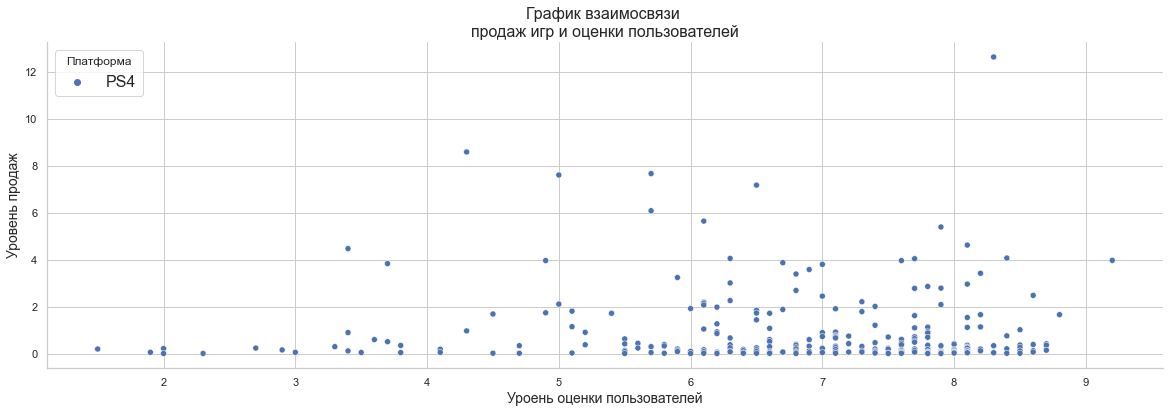

'Платформа XOne'

,critic_score,user_score,sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
sales,0.406568,-0.031957,1.000000


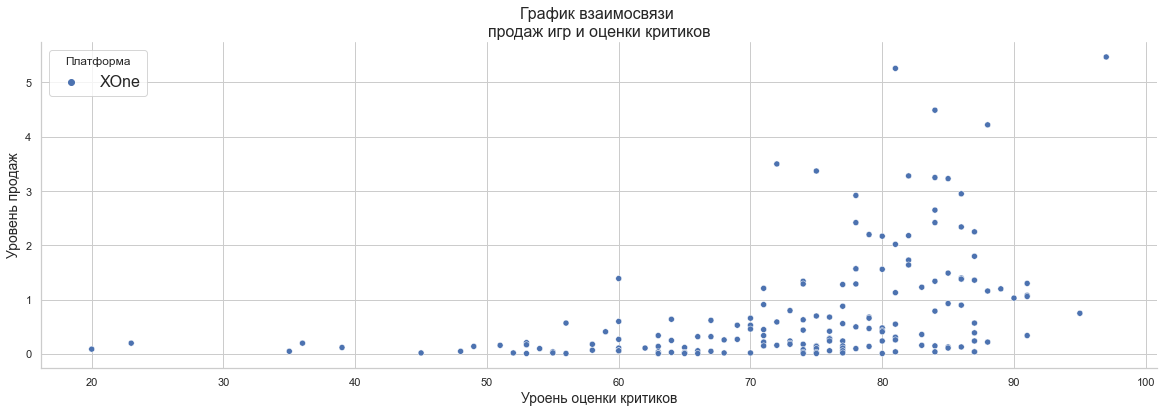

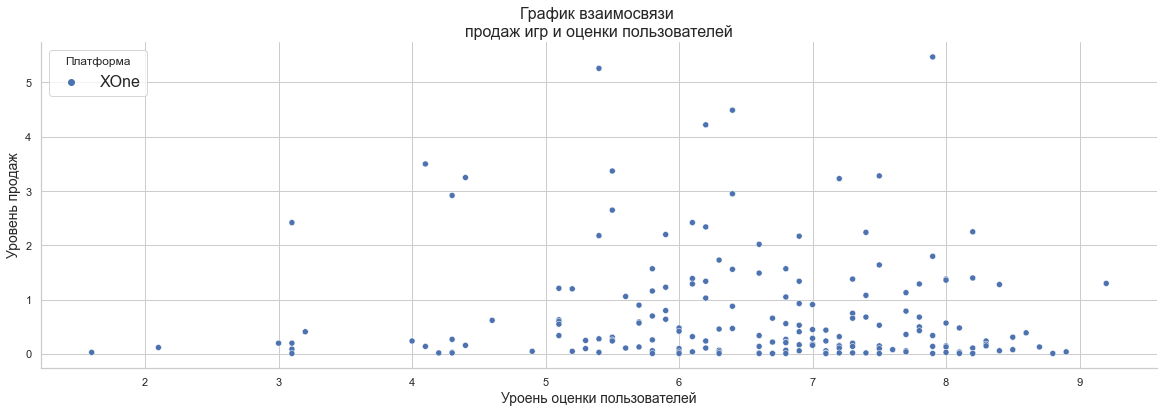

'Платформа PS3'

,critic_score,user_score,sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
sales,0.416998,-0.068925,1.000000


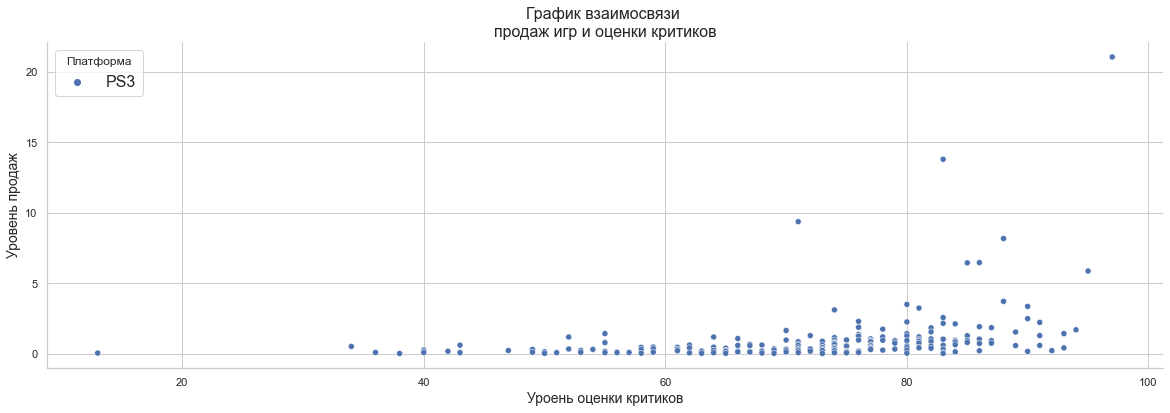

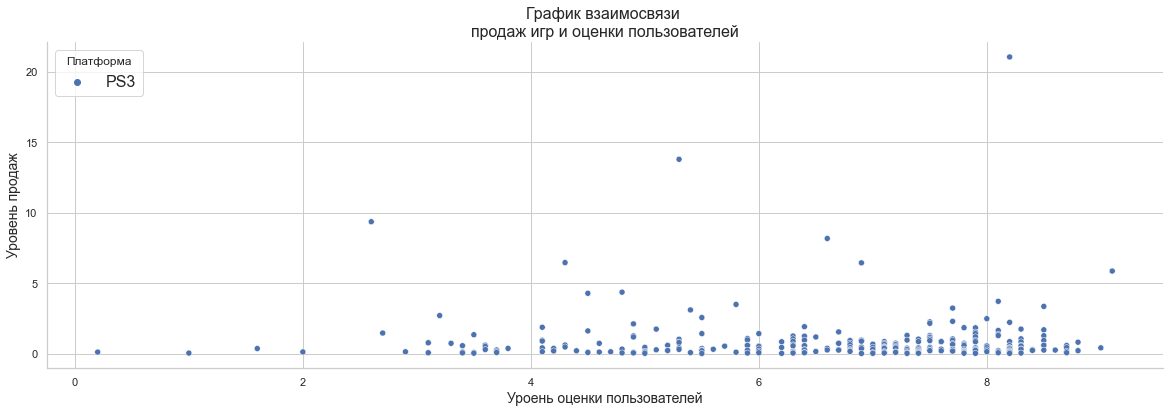

'Платформа X360'

,critic_score,user_score,sales
critic_score,1.000000,0.539456,0.331497
user_score,0.539456,1.000000,-0.005144
sales,0.331497,-0.005144,1.000000


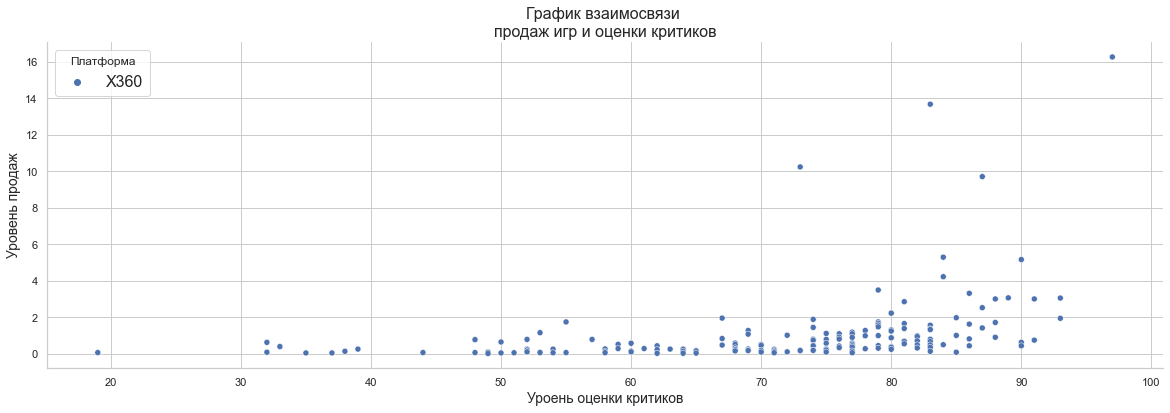

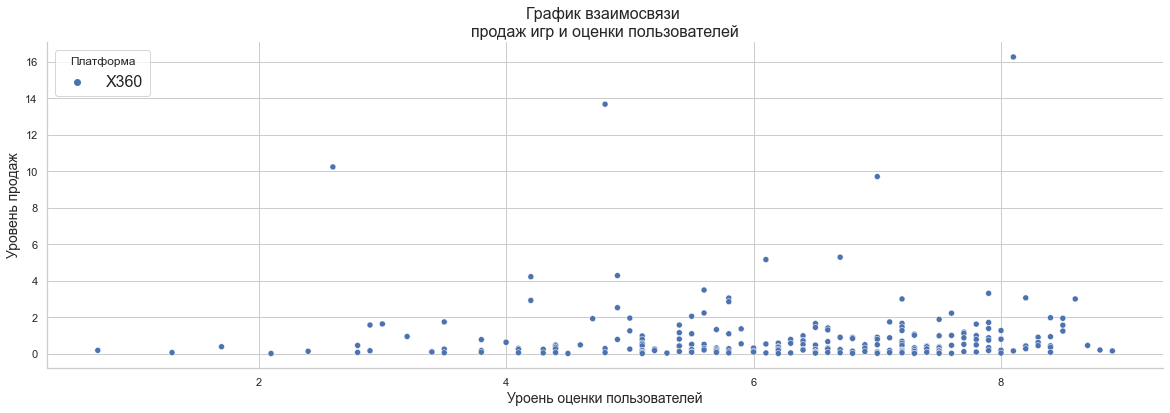

'Платформа WiiU'

,critic_score,user_score,sales
critic_score,1.000000,0.557352,0.360573
user_score,0.557352,1.000000,0.006164
sales,0.360573,0.006164,1.000000


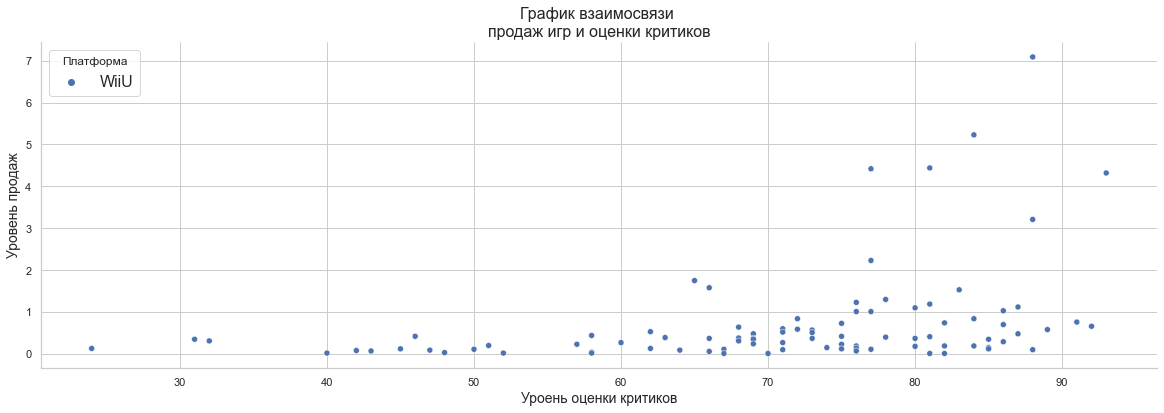

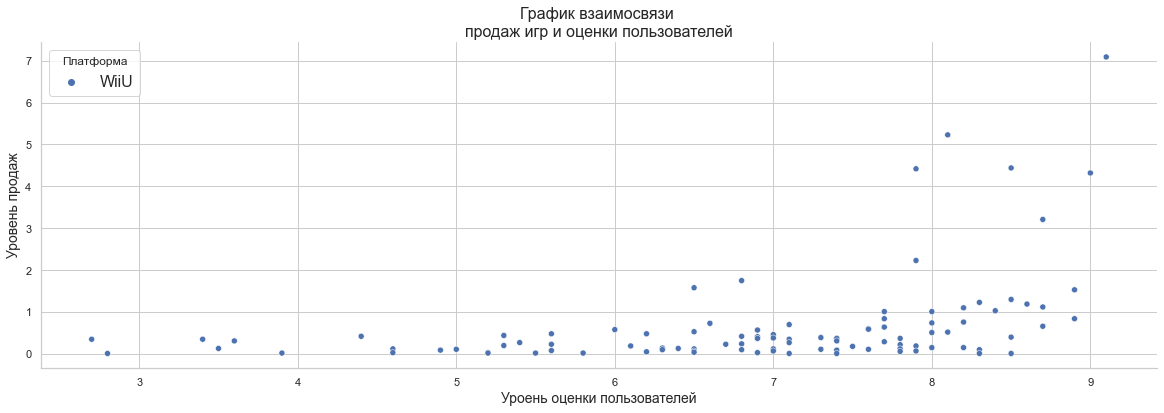

'Платформа Wii'

,critic_score,user_score,sales
critic_score,1.000000,0.770080,0.348380
user_score,0.770080,1.000000,0.400219
sales,0.348380,0.400219,1.000000


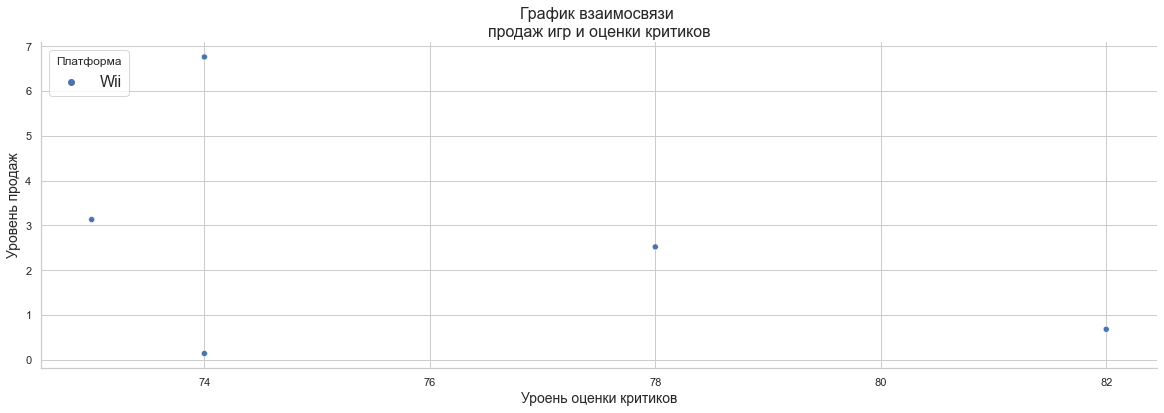

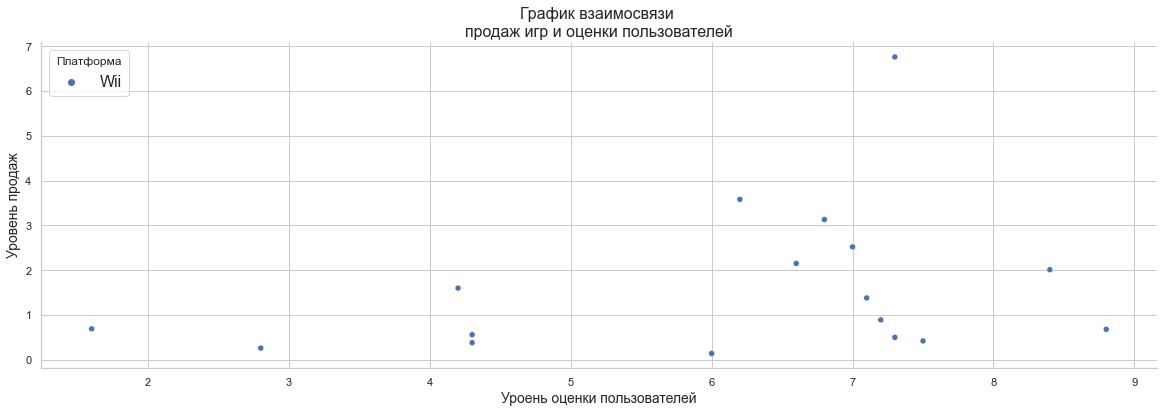

In [37]:
list_g = ['PS4', 'XOne', 'PS3', 'X360', 'WiiU', 'Wii']
for col_l in list_g:
    display('Платформа '+col_l)
    corr_top = games_actual_top[['critic_score', 'user_score', 'sales']].corr()
    display(corr_top.style.background_gradient(cmap='coolwarm'))

    games_actual_top = games_actual.loc[games_actual['platform'] == col_l]
    plt.figure(figsize=(20, 6))
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="whitegrid", rc=custom_params, palette="deep")
    sns.scatterplot(x='critic_score', y="sales",
                    data=games_actual_top, hue='platform')
    # Plot formatting
    plt.title('График взаимосвязи \nпродаж игр и оценки критиков', fontsize=16)
    plt.xlabel('Уроень оценки критиков', fontsize=14)
    plt.ylabel('Уровень продаж', fontsize=14)
    plt.legend(prop={'size': 16}, title='Платформа', loc='upper left')
    plt.show()

    # Строим график
    plt.figure(figsize=(20, 6))
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="whitegrid", rc=custom_params, palette="deep")
    sns.scatterplot(x='user_score', y="sales",
                    data=games_actual_top, hue='platform')
    # Plot formatting
    plt.title('График взаимосвязи \nпродаж игр и оценки пользователей', fontsize=16)
    plt.xlabel('Уроень оценки пользователей', fontsize=14)
    plt.ylabel('Уровень продаж', fontsize=14)
    plt.legend(prop={'size': 16}, title='Платформа', loc='upper left')
    plt.show()

- по всем платформам корреляция оценок коритиков и оценок игроков выше чем корреляция продаж и оценок (те оценки и проджи не всегда совпадают , а вот оценки разных групп чаще схожи между собой)
- видно что для платформ WiiU и Wii зафиксированных оценок много меньше , чем по дугим платформам. Что подтверждает нашу теорию о пропусках (зафиксированы рейтинги и оценки не для всех выделенных регионов)  

Рассмотрим общее распределение игр по жанрам. 

In [38]:
genre_pivot = games_actual.groupby('genre')['sales'].sum(
).sort_values(ascending=False).reset_index()
genre_pivot.columns = ['genre', 'total_sales']
genre_pivot

,genre,total_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.07
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


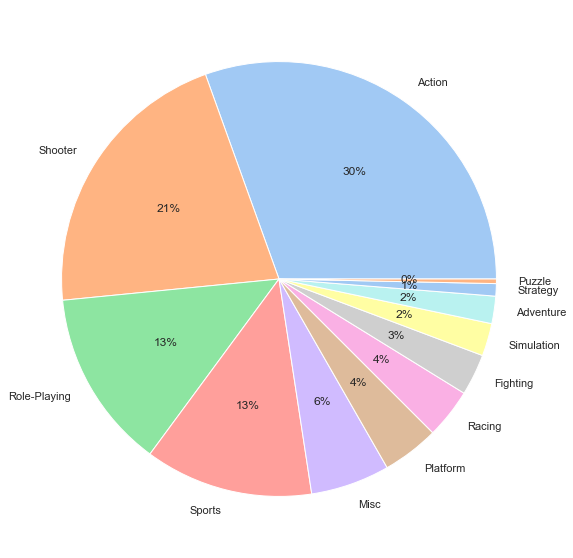

In [39]:
# define data
data = genre_pivot['total_sales']
labels = genre_pivot['genre']

# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:12]

# create pie chart
plt.figure(figsize=(10, 10))
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')

plt.show()

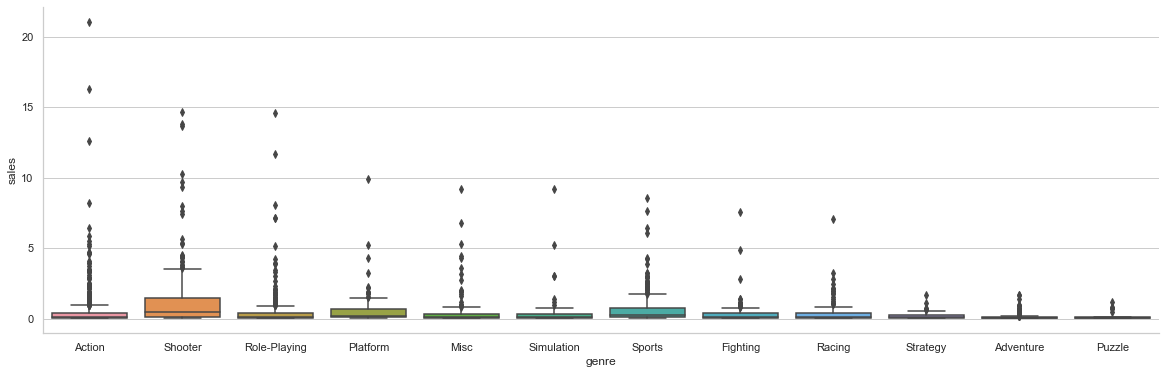

In [40]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='genre', y="sales", data=games_actual)
plt.show()

Изменим масштаб

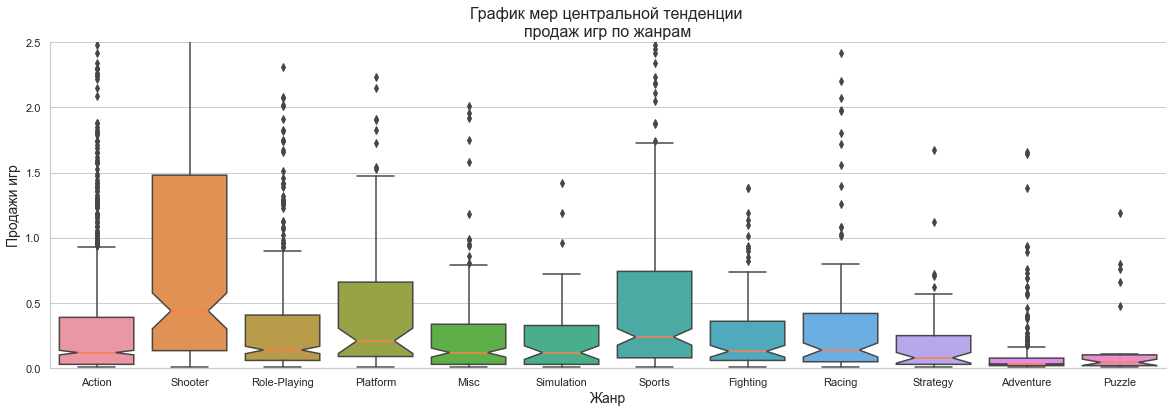

In [41]:
# Строим график
plt.figure(figsize=(20, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params, palette="pastel")
sns.boxplot(x='genre', y="sales", data=games_actual, notch=True, medianprops={
    "color": "coral"})

# Plot formatting
plt.title('График мер центральной тенденции \nпродаж игр по жанрам', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Продажи игр', fontsize=14)

plt.ylim(-0, 2.5)
plt.show()

После дополнительного анализа можем рекомендовать для продаж игры в жанрах  Shooter/ Sports/ Platform   

### Предварительный вывод 

По итогам исследовательского анализа данных определены

- Суммарное количество выпущенных игр в каждый год
- Актуальный период для анализа рынка (записи после 2005г)
- Лидеры по совокупным объемам продаж 
- Период развития игровых платформ
- Уточнены платформы со стабильно хорошими продажами на всем периоде своего присутствия на рынке
- Как следствие уточнены платформы котроые сейчас находятся в хорошей "рыночной фазе" (на них можно сделать ставку) 
- Наличие взаимсвязи продаж и оценок критиков и игроков 
- Восходящие звёзды ,новое поколение платформ:  PS4 и Xone.
- Уточнены жанры со стабильно хорошими продажами  ( Shooter / Sports/ Platform)

## Портрет пользователя каждого региона

Для пользователя каждого важного рыночного региона (NA, EU, JP) определим его профиль:
- Самые популярные платформы (топ-5) 
- Самые популярные жанры (топ-5) 
- Влияние рейтинга ESRB на продажи в регионе

In [42]:
# функция дл явывода данных по каждому региону
def profile(df, task, *columns):
    i = 0
    for column in columns:
        # суммарные продажи по жанру/ платформе в регионе
        task_df_column = df.groupby(task)[column].sum(
        ).sort_values(ascending=False).reset_index()
        task_df_column[task][5:] = 'Other'
        task_df_column = task_df_column.groupby(
            task)[column].sum().reset_index()
        # доля продаж по жанру/ платформе в общем по региону
        task_df_column['share'] = round(
            (task_df_column[column])*100/task_df_column[column].sum(), 2)
        display(task_df_column.head(7))

        # define data
        data = task_df_column['share']
        labels = task_df_column[task]
# define Seaborn color palette to use
        colors = sns.color_palette('pastel')[0:6]
# create pie chart
        plt.figure(figsize=(10, 10))
        plt.pie(data, labels=labels, colors=colors, autopct='%.2f%%')
        plt.title('График наиболее популярных \nигр по {} в регионе {}'.format(
            task, column[:2]), fontsize=16)
        plt.show()
        print('*'*20)

,genre,na_sales,share
0,Action,177.84,30.09
1,Misc,38.19,6.46
2,Other,84.64,14.32
3,Role-Playing,64.00,10.83
4,Shooter,144.77,24.50
5,Sports,81.53,13.80


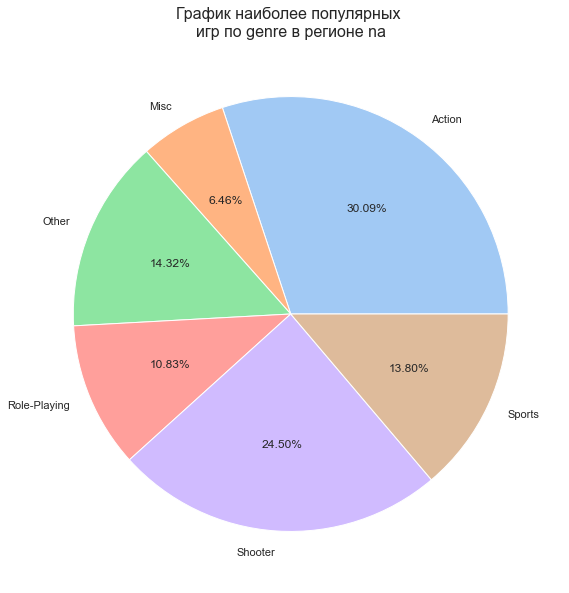

********************


,genre,eu_sales,share
0,Action,159.34,31.44
1,Other,89.10,17.58
2,Racing,27.29,5.38
3,Role-Playing,48.53,9.58
4,Shooter,113.47,22.39
5,Sports,69.09,13.63


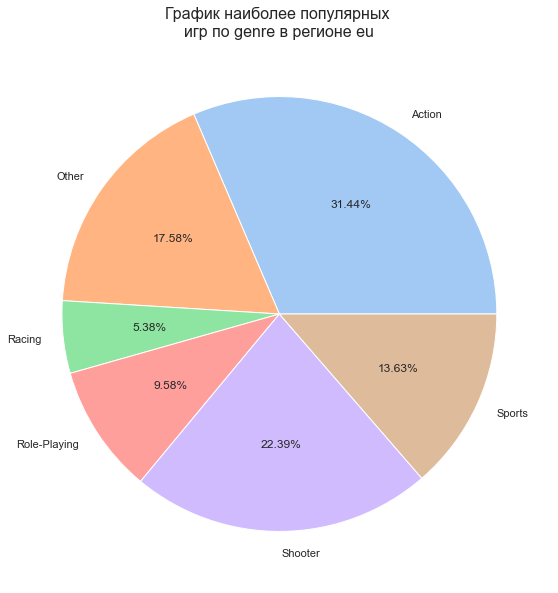

********************


,genre,jp_sales,share
0,Action,52.80,27.42
1,Fighting,9.44,4.90
2,Misc,12.86,6.68
3,Other,41.63,21.62
4,Role-Playing,65.44,33.98
5,Simulation,10.41,5.41


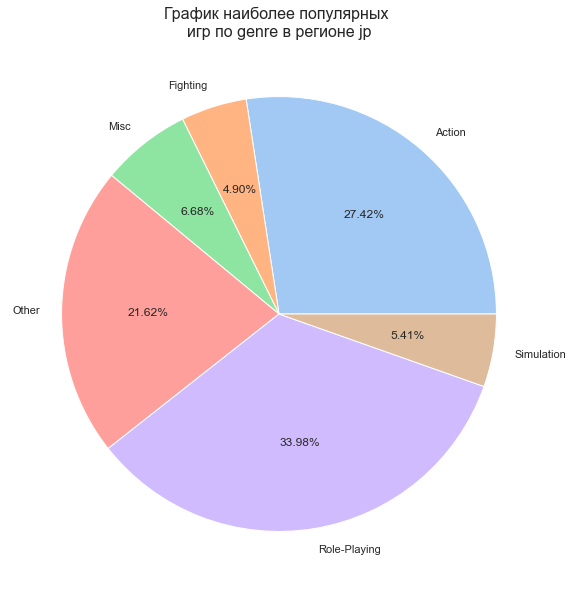

********************


In [43]:
profile(games_actual, 'genre', 'na_sales', 'eu_sales', 'jp_sales')

,platform,na_sales,share
0,3DS,55.31,9.36
1,Other,90.37,15.29
2,PS3,103.38,17.49
3,PS4,108.74,18.40
4,X360,140.05,23.70
5,XOne,93.12,15.76


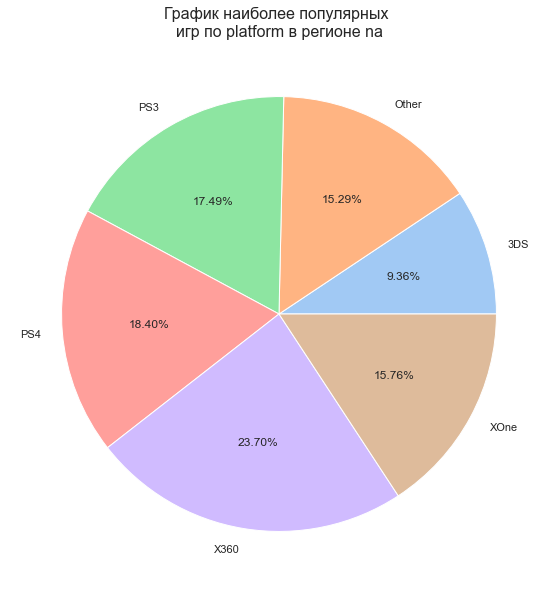

********************


,platform,eu_sales,share
0,3DS,42.64,8.41
1,Other,90.12,17.78
2,PS3,106.86,21.08
3,PS4,141.09,27.84
4,X360,74.52,14.70
5,XOne,51.59,10.18


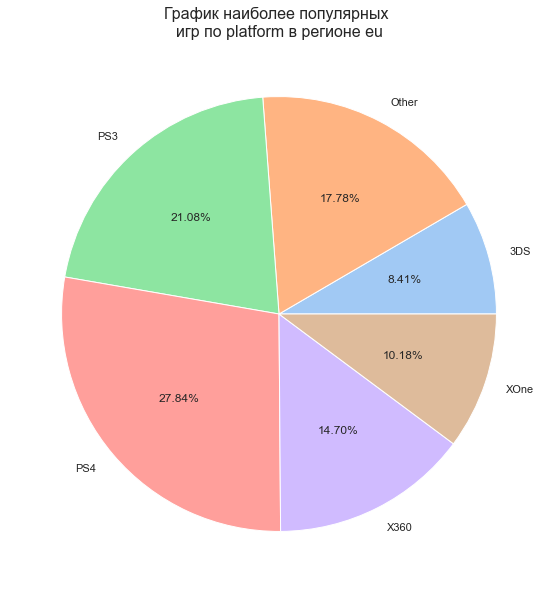

********************


,platform,jp_sales,share
0,3DS,87.79,45.59
1,Other,19.49,10.12
2,PS3,35.29,18.32
3,PS4,15.96,8.29
4,PSV,21.04,10.93
5,WiiU,13.01,6.76


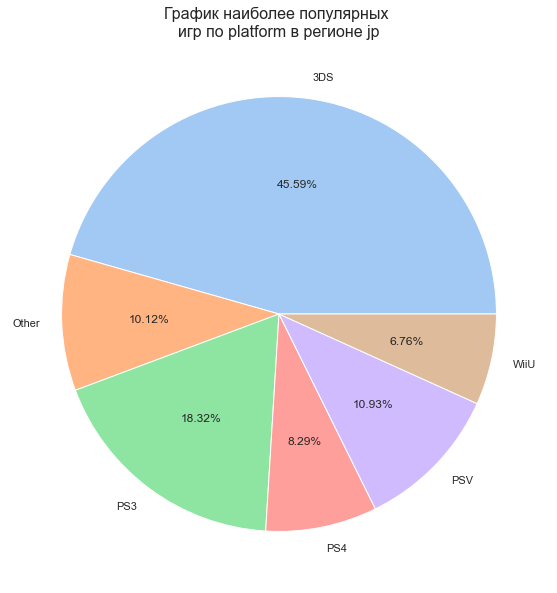

********************


In [44]:
profile(games_actual, 'platform', 'na_sales', 'eu_sales', 'jp_sales')

,rating,na_sales,share
0,E,114.37,19.35
1,E10+,75.70,12.81
2,M,231.57,39.18
3,T,66.02,11.17
4,Нет оценок,103.31,17.48


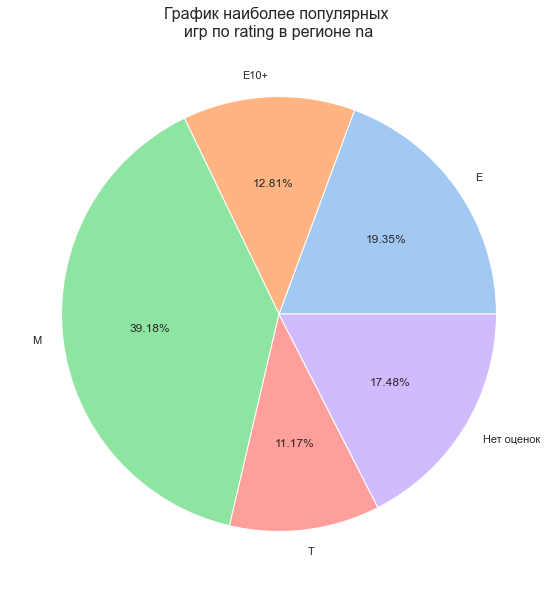

********************


,rating,eu_sales,share
0,E,113.03,22.30
1,E10+,55.37,10.92
2,M,193.96,38.27
3,T,52.96,10.45
4,Нет оценок,91.50,18.05


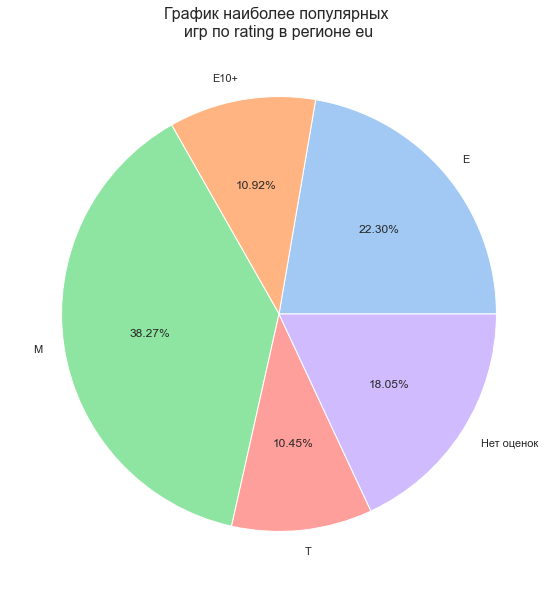

********************


,rating,jp_sales,share
0,E,28.33,14.71
1,E10+,8.19,4.25
2,M,21.20,11.01
3,T,26.02,13.51
4,Нет оценок,108.84,56.52


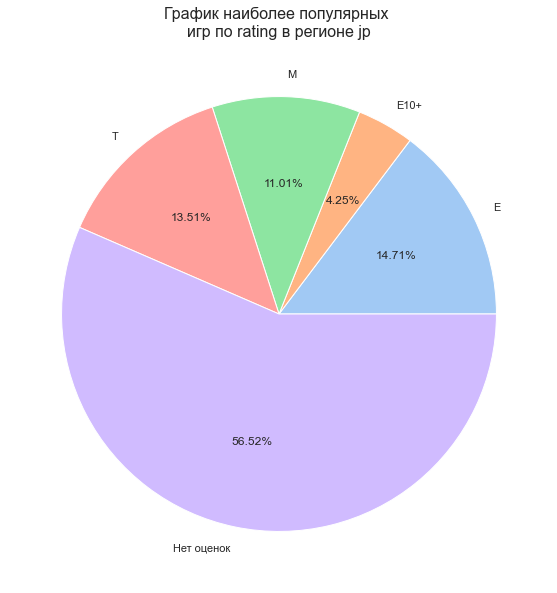

********************


In [45]:
profile(games_actual, 'rating', 'na_sales', 'eu_sales', 'jp_sales')

### Предварительный вывод 

- Для Америки и Европы более характерны продажи PS3/PS4 (PlayStation,Япония)и XOne/X360 (Xbox,США) 
- Для Японии более характерны продажи 3DS (Nintendo,Япония). 
- По жанровым предпочтениям европейский и американский рынок похожи - лидерами являются жанры (Action/ Sports/ Shooter).  в то в ремя как для японцев очень популярны игры в жанре  (Role-Playing/Action). 
- Влияние  рейтинга ESRB на продажи также заметно. Европейский и американский рынок опять показывают одинковые тендеции. В не зависимости от жанра и платформы  чаще покупают  «E» («Everyone») /«M» («Mature»)/ чуть реже «T» («Teen») — те игры востребованы у всех возрастных аудиторий. 
- Данных по присвоению рейтинга на японском рынке почти нет.. Истинная оценка затруднена. 


## Проверка гипотез

Проверим гипотезу о равенстве средних оценок игр пользователями на платформах и на обычных компьютерах.
В нашем распряжении пара совокупностей.Они не зависят друг от друга.  Для сравнения средних сформируем выборки по интерсующим параметрам, а так же уберем оттуда пропуски и нулевые значения(они будут мешать при подсчете среднего).

In [46]:
sample_XOne = games_actual.loc[(games_actual['user_score'] > 0) & (
    games_actual['platform'] == 'XOne'), ['user_score']]
sample_PC = games_actual.loc[(games_actual['user_score'] > 0) & (
    games_actual['platform'] == 'PC'), ['user_score']]

In [47]:
compare_sample_platform = pd.DataFrame({'parametrs': ['минимум', 'среднее', 'стандартное отклонение', 'дисперсия', 'максимум', 'медиана'],
                                        'XOne': [sample_XOne.min(), sample_XOne.mean(),
                                                 np.std(sample_XOne, ddof=1), np.var(
                                            sample_XOne, ddof=1),
                                        sample_XOne.max(), sample_XOne.median()],
                                        'PC': [sample_PC.min(), sample_PC.mean(),
                                               np.std(sample_PC, ddof=1), np.var(
                                            sample_PC, ddof=1),
    sample_PC.max(), sample_PC.median()]})
compare_sample_platform

,parametrs,XOne,PC
0,минимум,user_score 1.60 dtype: float64,user_score 1.40 dtype: float64
1,среднее,user_score 6.52 dtype: float64,user_score 6.43 dtype: float64
2,стандартное отклонение,user_score 1.38 dtype: float64,user_score 1.66 dtype: float64
3,дисперсия,user_score 1.91 dtype: float64,user_score 2.77 dtype: float64
4,максимум,user_score 9.20 dtype: float64,user_score 9.30 dtype: float64
5,медиана,user_score 6.80 dtype: float64,user_score 6.80 dtype: float64


Учтем что дисперсии в них различны. Сравним средние t-тестом методом ttest_ind()

Сформулируем нулевую гипотезу $\mathcal{H₀}$ :

    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    - Альтернативная гипотеза H₁ - Средние пользовательские рейтинги платформ Xbox One и PC различны.
    
 пороговое значение alpha зададим как 5%

In [48]:
alpha = .05
results = st.ttest_ind(sample_XOne, sample_PC, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: [0.5489538]
Не получилось отвергнуть нулевую гипотезу.


Вероятность получить одинаковые значения выше чем установленный нами порог уровня статистической значимости. Занчит оснований отвергуть нулевую гипотезу у нас нет.

Так же проверим гипотезу о равенстве средних оценок игр пользователями разных популярных жанров . Например Action и Sports.
В нашем распряжении ещё одна пара совокупностей. Они тоже зависят друг от друга.  Для сравнения средних сформируем выборки по интерсующим параметрам, и снова уберем оттуда пропуски и нулевые значения.

In [49]:
sample_action = games_actual.loc[(games_actual['user_score'] > 0) & (
    games_actual['genre'] == 'Action'), ['user_score']]
sample_sports = games_actual.loc[(games_actual['user_score'] > 0) & (
    games_actual['genre'] == 'Sports'), ['user_score']]

In [50]:
compare_sample_genre = pd.DataFrame({'parametrs': ['минимум', 'среднее', 'стандартное отклонение', 'дисперсия', 'максимум', 'медиана'],
                                     'XOne': [sample_action.min(), sample_action.mean(),
                                              np.std(sample_action, ddof=1), np.var(
                                         sample_action, ddof=1),
    sample_action.max(), sample_action.median()],
    'PC': [sample_sports.min(), sample_sports.mean(),
           np.std(sample_sports, ddof=1), np.var(
        sample_sports, ddof=1),
    sample_sports.max(), sample_sports.median()]})
compare_sample_genre

,parametrs,XOne,PC
0,минимум,user_score 1.60 dtype: float64,user_score 0.20 dtype: float64
1,среднее,user_score 6.83 dtype: float64,user_score 5.46 dtype: float64
2,стандартное отклонение,user_score 1.37 dtype: float64,user_score 1.74 dtype: float64
3,дисперсия,user_score 1.89 dtype: float64,user_score 3.02 dtype: float64
4,максимум,user_score 9.10 dtype: float64,user_score 8.80 dtype: float64
5,медиана,user_score 7.10 dtype: float64,user_score 5.70 dtype: float64


Снова видим что  дисперсии в них различны. Сравним средние t-тестом методом ttest_ind()

Сформулируем нулевую гипотезу $\mathcal{H₀}$ :

    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
    - Альтернативная гипотеза H₁ - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
alpha = 5%

In [51]:
alpha = .05
results = st.ttest_ind(sample_action, sample_sports, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: [4.24307777e-20]
Отвергаем нулевую гипотезу.


### Предварительный вывод 
Критерием для принятия или отвержения нулевой гипотезы будет получить статистически значимую вероятность равенства средних выборки из двух совокупностей между собой. . При вероятности >5%  у нас нет оснований отвенргуть сформулированную нулевую гипотезу.
- Вероятность получить одинаковые значения выше чем установленный нами порог уровня статистической значимости. Занчит оснований отвергуть нулевую гипотезу  о том что средние пользовательские рейтинги платформ Xbox One и PC различны у нас нет.
- Для второй гипотезы вероятность получить одинаковые значения ниже чем установленный нами порог уровня статистической значимости. Значит можем отвергуть гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковы


## Вывод

Проанализированы полученные из открытых источников исторические данные о более 16 000 записей о продажах игр  
Исходная информация подготовлена для тщательного анализа

В ходе анализа проведена следующая работа:
       
    определен период общего анализа с 1980 по 2016гг (данные за крайние года могут быть не полными)
    выявлены незначительное количество пропусков в названиях игр.
    выявлены пропуски в оценках критиков. связано с тем, что рейтинг ESRB,предназначен для маркировки игр для США и Канады
    выполнено преобразование типов данных со значениями дат
    выявлено дублирование названий игр для разных платформ. Принято как записи с различными значениями для отдельного анализа по платформам.
    значения с невыставленными оценками в графе "оценка пользователей" приравнены к пропускам
    введено дополнительное значение с суммарными значениями по продажам каждого наименования.
    
Пропуски не возможно заполнить тк их значения (оценки критиков/игроков/рейтинг ESRB) уникальны для каждой записи. даже если на одной платформе инра получила некторые оценки, то не факт что такие же она получит у игроков предпочитающих другие платформы/ находящихся в другом регионе. Для более точного анализа необходимы более полные данные.
    
Определено и представлено в табличном  и графическом виде:

    суммарное количество выпущенных игр в каждый год
    актуальный период для анализа рынка (записи после 2011г)
    лидеры по совокупным объемам продаж 
    период развития игровых платформ
    уточнены платформы со стабильно хорошими продажами на всем периоде своего присутствия на рынке
    как следствие уточнены платформы котроые сейчас находятся в хорошей "рыночной фазе"  
    наличие взаимсвязи продаж и оценок критиков и игроков 
    самые широкопродаваемые жанры игр  
    сформирован профиль пользователя каждого региона
    определены жанровые предпочтения дл якаждого региона
    определена взаимосвязь рейтингов ESRB и уровня продаж в при наличии оценок (для североамериканского региона)
   
Сформулированы и проверены гипотезы о равенстве уровня средних оценок игр пользователями  

    пользовательские рейтинги платформ Xbox One и PC 
    пользовательские рейтинги жанров Action и Sports 

Итог анализа:

- "Восходящие звезды",новое поколение платформ:  PS4 и XОne.
- оценки критиков/игроков  и проджи не всегда совпадают , а вот оценки разных групп чаще схожи между собой
- Самые широкопродаваемые жанры игр ( Shooter/ Sports/ Platform )
- Для Америки и Европы более характерны продажи PS3/PS4 (PlayStation,Япония)и XOne/X360 (Xbox,США) 
- Для Японии более характерны продажи 3DS (Nintendo,Япония) 
- По жанровым предпочтениям для европейского и американского рынков лидерами являются Action/ Sports/ Shooter
- Для японцев очень популярны игры в жанре  Role-Playing/Action. 
- Вне зависимости от жанра и платформы европейцы и американцы чаще покупают  «E» («Everyone») /«M» («Mature»)/ чуть реже «T» («Teen») 
- На японском рынке определить взаимосвязь рейтинга и продаж невозвожно ввиду отсутвия оценок в данных по данному региону. 
- У накс нет отвергуть нулевую гипотезу о том что средние пользовательские рейтинги платформ Xbox One и PC различны
- Можем отвергуть гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковы


## Рекомендации

- Рекламную кампанию проводить в североамериканском регионе для платформ  PS4 и Xone в жанрах  Sports/ Shooter с рейтингами «E» («Everyone») /«M» («Mature»)
- Оценками критиков придавать не высокое значение.